In [33]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold, cross_val_predict, train_test_split, cross_val_score


In [3]:
## reading files
train_df = pd.read_csv('train_3.csv')
test_df = pd.read_csv('test_3.csv')

In [4]:
#checking for NA values in train and test
print(train_df.isna().sum(),test_df.isna().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [5]:
#dropping Loan_ID column from train and test, as it will not help in prediction
train_df.drop(columns=['Loan_ID'], inplace=True)
#print(train_df)
test_df.drop(columns=['Loan_ID'], inplace=True)
#print(test_df)

In [6]:
## missing values imputation in train
for i in train_df.columns:
    if train_df[i].dtype == 'object':
      train_df[i] = train_df[i].fillna(train_df[i].mode().iloc[0])
    if (train_df[i].dtype == 'int' or train_df[i].dtype == 'float'):
      train_df[i] = train_df[i].fillna(np.mean(train_df[i]))

In [7]:
## missing values imputation in test
for i in test_df.columns:
    if test_df[i].dtype == 'object':
      test_df[i] = test_df[i].fillna(test_df[i].mode().iloc[0])
    if (test_df[i].dtype == 'int' or test_df[i].dtype == 'float'):
      test_df[i] = test_df[i].fillna(np.mean(test_df[i]))

In [8]:
## label encoding for categorial variables in train_df
number = LabelEncoder()
for i in train_df.columns:
    if (train_df[i].dtype == 'object'):
      train_df[i] = number.fit_transform(train_df[i].astype('str'))
      train_df[i] = train_df[i].astype('object')

In [9]:
## label encoding for categorial variables in test_df
for i in test_df.columns:
    if (test_df[i].dtype == 'object'):
      test_df[i] = number.fit_transform(test_df[i].astype('str'))
      test_df[i] = test_df[i].astype('object')

In [11]:
## creating a new feature origin
train_df['origin'] = 0                     # fix origin = 0 for all row in train_df
test_df['origin'] = 1                      # fix origin = 1 for all row in test_df
training = train_df.drop('Loan_Status',axis=1)     #droping target variable

In [13]:
## taking sample from training and test data
training = training.sample(102, random_state=12)                 # a random sample selection from train
testing = test_df.sample(88, random_state=11)                      # a random sample selection from test

In [14]:
## combining random samples
combi = training.append(testing)
y = combi['origin']
combi.drop('origin',axis=1,inplace=True)              # dropping column Origin

In [60]:
## defining and fitting model
model = RandomForestClassifier(n_estimators = 50, max_depth = 5,min_samples_leaf = 5)
drop_list = []                                           # initalise an array
for i in combi.columns:
    score = cross_val_score(model,pd.DataFrame(combi[i]),y,cv=2,scoring='roc_auc')           #taking one feature at a time and calculation roc_auc score
    if (np.mean(score) > 0.5):                           
        drop_list.append(i)                             # apend array drop_list for each feature scoring roc_auc more than treshold 0.5
    #print(i,np.mean(score))
print(drop_list)


['Dependents', 'Self_Employed', 'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


C:\Users\HP\anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


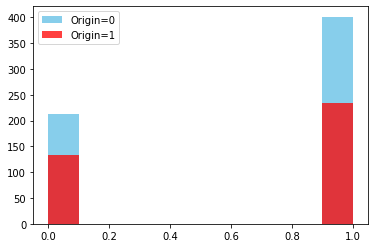

In [20]:
#Plotting histogram of drifting features to visualize the data shift
train_df['Origin'] = 0                        # defining Origin = 0 for train data
test_df['Origin'] = 1                         # defining Origin = 1 for train data
combine_df=pd.concat([train_df,test_df], axis=0, ignore_index=True)              # concating both train and test as combine_df dataset
plt.hist(combine_df.loc[combine_df['Origin'] == 0,"Married"], color="skyblue", label="Origin=0")
plt.hist(combine_df.loc[combine_df['Origin'] == 1,"Married"],color="red",alpha=.75, label="Origin=1")
plt.legend()
plt.show()

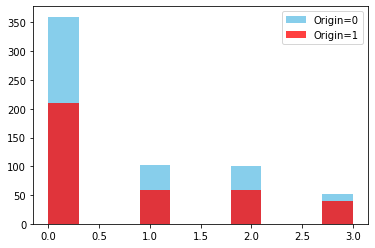

In [23]:
#Plotting histogram with Dependents feature to show the drift

plt.hist(combine_df.loc[combine_df['Origin'] == 0,"Dependents"], color="skyblue", label="Origin=0")
plt.hist(combine_df.loc[combine_df['Origin'] == 1,"Dependents"],color="red",alpha=.75, label="Origin=1")
plt.legend()
plt.show()

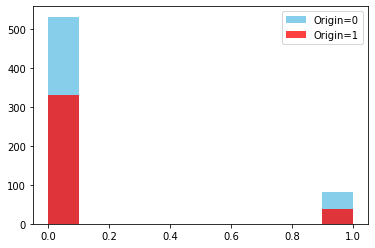

In [24]:
#Plotting histogram with Self_Employed feature to show the drift

plt.hist(combine_df.loc[combine_df['Origin'] == 0,"Self_Employed"], color="skyblue", label="Origin=0")
plt.hist(combine_df.loc[combine_df['Origin'] == 1,"Self_Employed"],color="red",alpha=.75, label="Origin=1")
plt.legend()
plt.show()

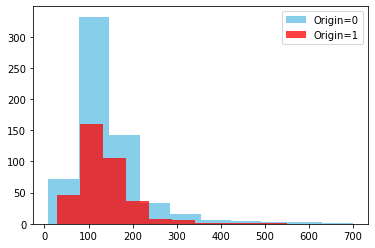

In [25]:
#Plotting histogram with LoanAmount feature to show the drift

plt.hist(combine_df.loc[combine_df['Origin'] == 0,"LoanAmount"], color="skyblue", label="Origin=0")
plt.hist(combine_df.loc[combine_df['Origin'] == 1,"LoanAmount"],color="red",alpha=.75, label="Origin=1")
plt.legend()
plt.show()

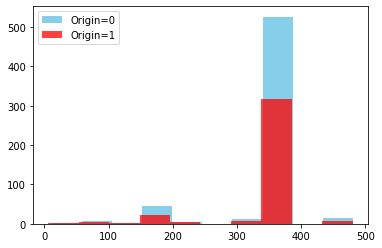

In [26]:
#Plotting histogram with Loan_Amount_Term feature to show the drift

plt.hist(combine_df.loc[combine_df['Origin'] == 0,"Loan_Amount_Term"], color="skyblue", label="Origin=0")
plt.hist(combine_df.loc[combine_df['Origin'] == 1,"Loan_Amount_Term"],color="red",alpha=.75, label="Origin=1")
plt.legend()
plt.show()

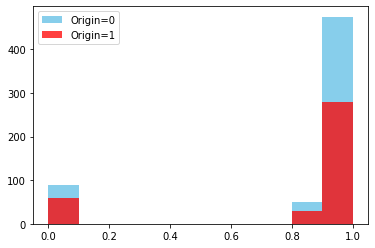

In [27]:
#Plotting histogram with Credit_History feature to show the drift

plt.hist(combine_df.loc[combine_df['Origin'] == 0,"Credit_History"], color="skyblue", label="Origin=0")
plt.hist(combine_df.loc[combine_df['Origin'] == 1,"Credit_History"],color="red",alpha=.75, label="Origin=1")
plt.legend()
plt.show()

In [47]:
#creating a new training set with 80% of test and train set
train_c=pd.concat([training[:8*len(training)//10], testing[:8*len(testing)//10]], sort = False)
#creating a new test set with 80% of test and train set
test_c=pd.concat([training[8*len(training)//10:], testing[8*len(testing)//10:]], sort = False)

In [49]:
#Evaluate data set with different models
X_train_o = train_c.drop("origin", axis=1)
Y_train_o = train_c["origin"]
X_test_o  = test_c.drop("origin", axis=1)
y_test_o = test_c["origin"]


In [50]:
#Calculation of metrics Precision, Recall, F1-Score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
def metricas(y_t,y_p):
    p=metrics.precision_score(y_t,y_p,average='weighted'),
    r=metrics.recall_score(y_t,y_p,average='weighted')
    f1=metrics.f1_score(y_t,y_p,average='weighted')
    return p,r,f1

In [51]:
def plot_curve(y_t,y_p):   
    fpr, tpr, umbral = roc_curve(y_t, y_p)
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # show the plot
    plt.show()

In [52]:
def b_ratio(probs):
    probs=probs+1e-20 #suavizar valores a 0
    b=(1./probs)-1 #calcular pesos
    b/= np.mean(b) #normalizar pesos
    sns.distplot(b, kde=False)
    plt.show()

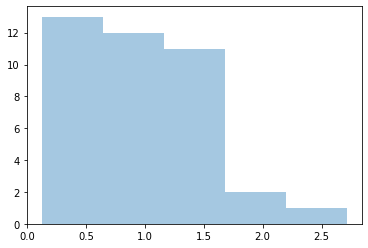

Acc:  58.97
Phi Coefficiente:  0.1649572197684645
ROC-AUC:  0.5793650793650794


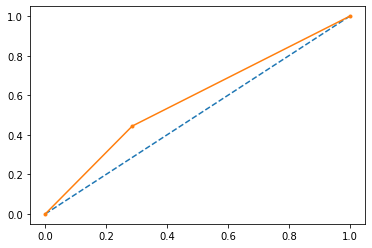

---------------------------------------------------------


In [53]:
# In the first evaluation, two metrics were used to verify the existence of covariate shift:
# if Phi Coefficient > 0.3 then there is covariate shift
# if AUC-ROC curve > 0.5 then there is covariate shift

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_o, Y_train_o)
Y_pred_o = random_forest.predict(X_test_o)
acc_random_forest = round(random_forest.score(X_test_o, y_test_o) * 100, 2)

probs = random_forest.predict_proba(X_test_o)[:, 0] #prob por muestra P(train|x)
b_ratio(probs)

print("Acc: ",acc_random_forest)
print("Phi Coefficiente: ",matthews_corrcoef(y_test_o, Y_pred_o))
print("ROC-AUC: ",roc_auc_score(y_test_o, Y_pred_o))
plot_curve(y_test_o,Y_pred_o)
print('---------------------------------------------------------')


In [61]:
# plotting 10 features covering important informance for prediction
features = train_df.drop('Loan_Status',axis=1).columns.values
imp = rf.feature_importances_
indices = np.argsort(imp)[::-1][:10]

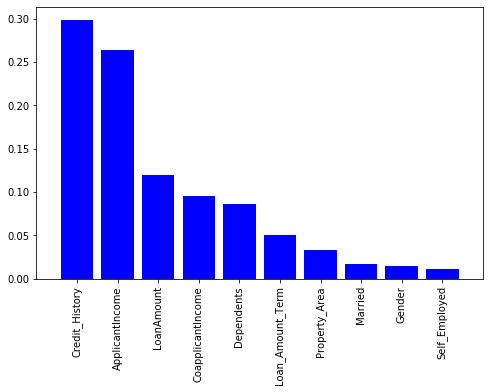

In [62]:
#plotting 8 such features containing maximum information for prediction
plt.figure(figsize=(8,5))
plt.bar(range(len(indices)), imp[indices], color = 'b', align='center')
plt.xticks(range(len(indices)), features[indices], rotation='vertical')
plt.xlim([-1,len(indices)])
plt.show()

In [63]:
## manully checked for features not coming dropping drifting features which are not important.
drift_train = training.drop(['Married', 'Self_Employed'], axis=1)
drift_test = testing.drop(['Married', 'Self_Employed'], axis=1)

In [68]:
#creating a new training set with 80% of test and train set
train_c=pd.concat([drift_train[:8*len(drift_train)//10], drift_test[:8*len(drift_test)//10]], sort = False)
#creating a new test set with 80% of test and train set
test_c=pd.concat([drift_train[8*len(drift_train)//10:], drift_test[8*len(drift_test)//10:]], sort = False)

In [69]:
#Evaluate data set with different models
X_train_o = train_c.drop("origin", axis=1)
Y_train_o = train_c["origin"]
X_test_o  = test_c.drop("origin", axis=1)
y_test_o = test_c["origin"]


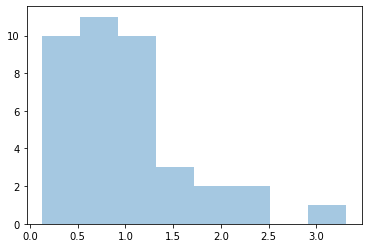

Acc:  69.23
Phi Coefficiente:  0.42132571839742106
ROC-AUC:  0.6706349206349206


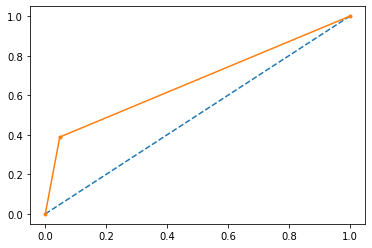

---------------------------------------------------------


In [70]:
# In the first evaluation, two metrics were used to verify the existence of covariate shift:
# if Phi Coefficient > 0.3 then there is covariate shift
# if AUC-ROC curve > 0.5 then there is covariate shift

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_o, Y_train_o)
Y_pred_o = random_forest.predict(X_test_o)
acc_random_forest = round(random_forest.score(X_test_o, y_test_o) * 100, 2)

probs = random_forest.predict_proba(X_test_o)[:, 0] #prob por muestra P(train|x)
b_ratio(probs)

print("Acc: ",acc_random_forest)
print("Phi Coefficiente: ",matthews_corrcoef(y_test_o, Y_pred_o))
print("ROC-AUC: ",roc_auc_score(y_test_o, Y_pred_o))
plot_curve(y_test_o,Y_pred_o)
print('---------------------------------------------------------')
